---------------------------------------
Affichage données initiales            xclara.arff


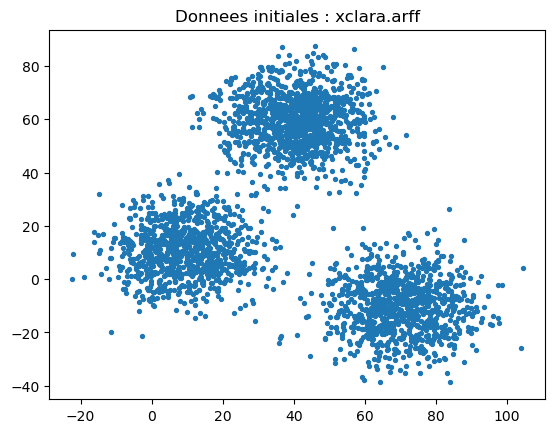

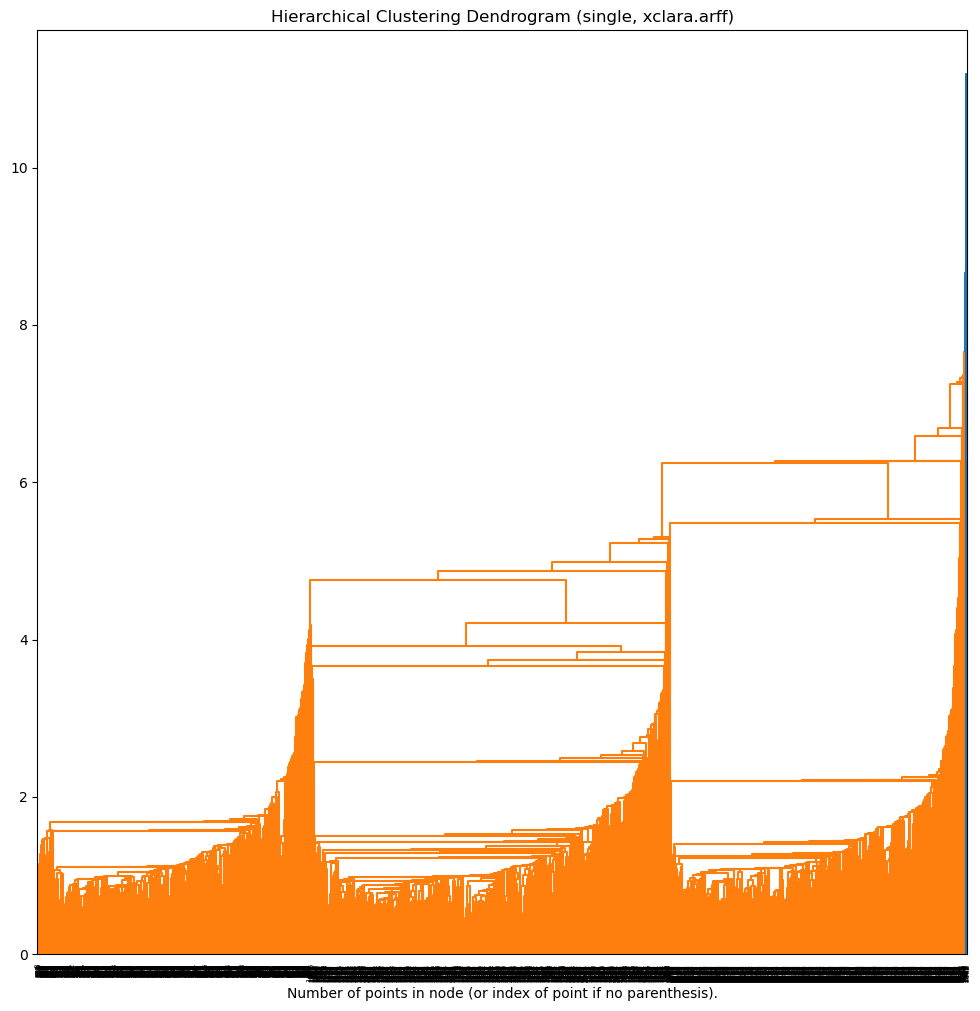

---------------------------------------
Affichage données initiales            square1.arff


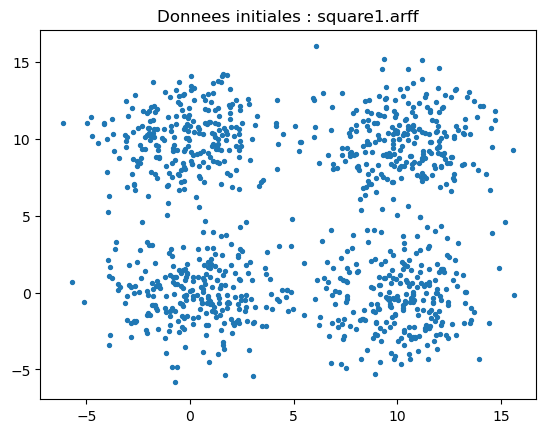

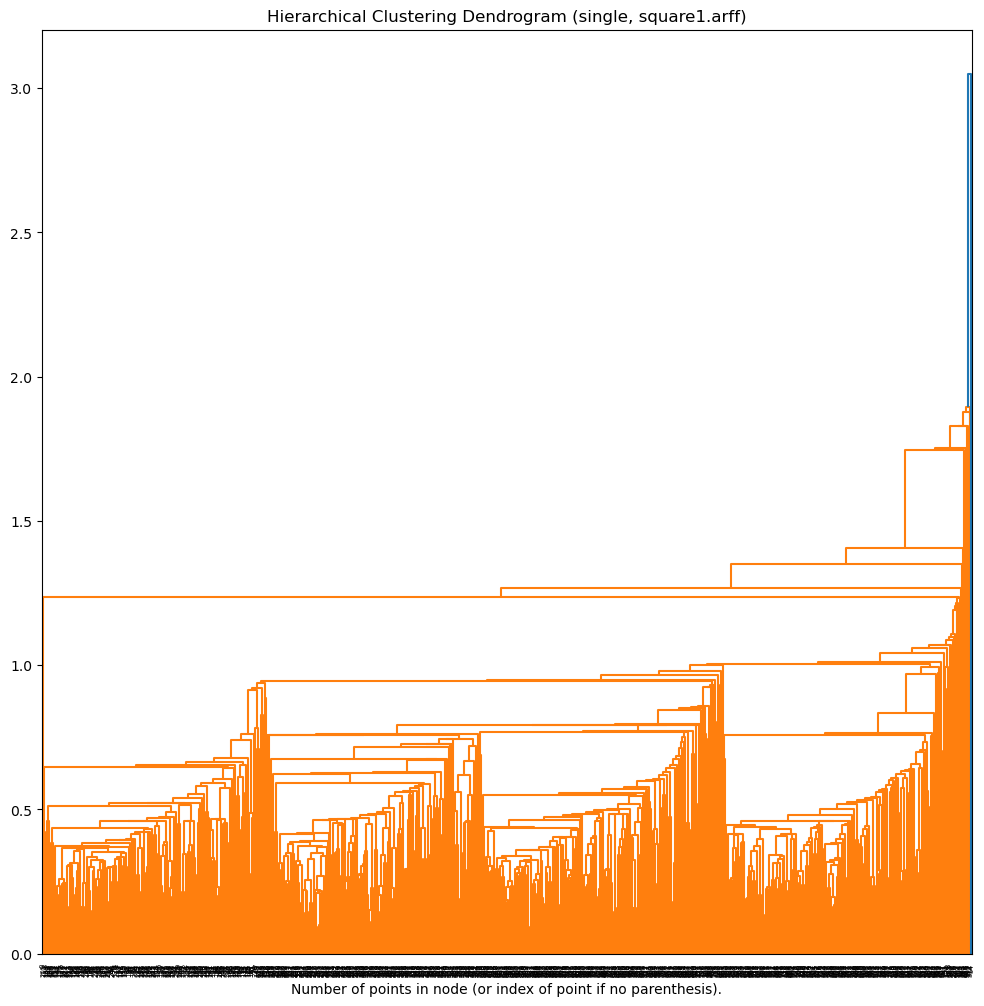

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram

##################################################################
# Exemple :  Dendrogramme and Agglomerative Clustering



path ='/home/khira/Tp-Clustring/artificial/'
name1="xclara.arff"
name2="square1.arff"
linkage = 'single'
def data_transform(filename):
    databrut = arff.loadarff(open(path+str(filename), 'r'))
    return np.array([[x[0],x[1]] for x in databrut[0]])



# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
names=[name1,name2]
for name in names:
    datanp= data_transform(name)
    print("---------------------------------------")
    print("Affichage données initiales            "+ str(name))
    f0 = datanp[:,0] # tous les élements de la première colonne
    f1 = datanp[:,1] # tous les éléments de la deuxième colonne

    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()

    #################################################
    from scipy.cluster.hierarchy import dendrogram

    def plot_dendrogram(model, **kwargs):
        # Create linkage matrix and then plot the dendrogram

        # create the counts of samples under each node
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)

        # Plot the corresponding dendrogram
        dendrogram(linkage_matrix) #, **kwargs)


    # setting distance_threshold=0 ensures we compute the full tree.
    model = cluster.AgglomerativeClustering(distance_threshold=0, linkage=linkage, n_clusters=None)

    model = model.fit(datanp)
    plt.figure(figsize=(12, 12))
    plt.title("Hierarchical Clustering Dendrogram ("+linkage+", "+str(name)+")")
    # plot the top p levels of the dendrogram
    plot_dendrogram(model) #, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

